# 복소 임피던스 데이터 시각화 및 회귀 분석

## 1. 데이터 로드

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Added for advanced model
from sklearn.metrics import mean_absolute_error, r2_score

# plt 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('rf_impedance_data.csv')
print(df.head())
print(df.info())


  Volunteer_ID  Gender Age_Group  Frequency_MHz    Facial_Area  \
0          V01  Female       40s            1.0       Forehead   
1          V01  Female       40s            1.0     Cheek_Left   
2          V01  Female       40s            1.0    Cheek_Right   
3          V01  Female       40s            1.0   Jawline_Left   
4          V01  Female       40s            1.0  Jawline_Right   

   Real_Impedance_Ohms  Imaginary_Impedance_Ohms  Output_Efficiency_Percentage  
0           355.576702                 23.291402                     80.114520  
1           180.242200                -95.559864                     85.364078  
2           171.053101                -85.748845                     82.535906  
3           122.861752                 34.362121                     81.718206  
4           159.909256               -102.756405                     81.877337  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column  

## 2. 데이터 탐색 및 시각화

### 2.1. 주요 변수 분포

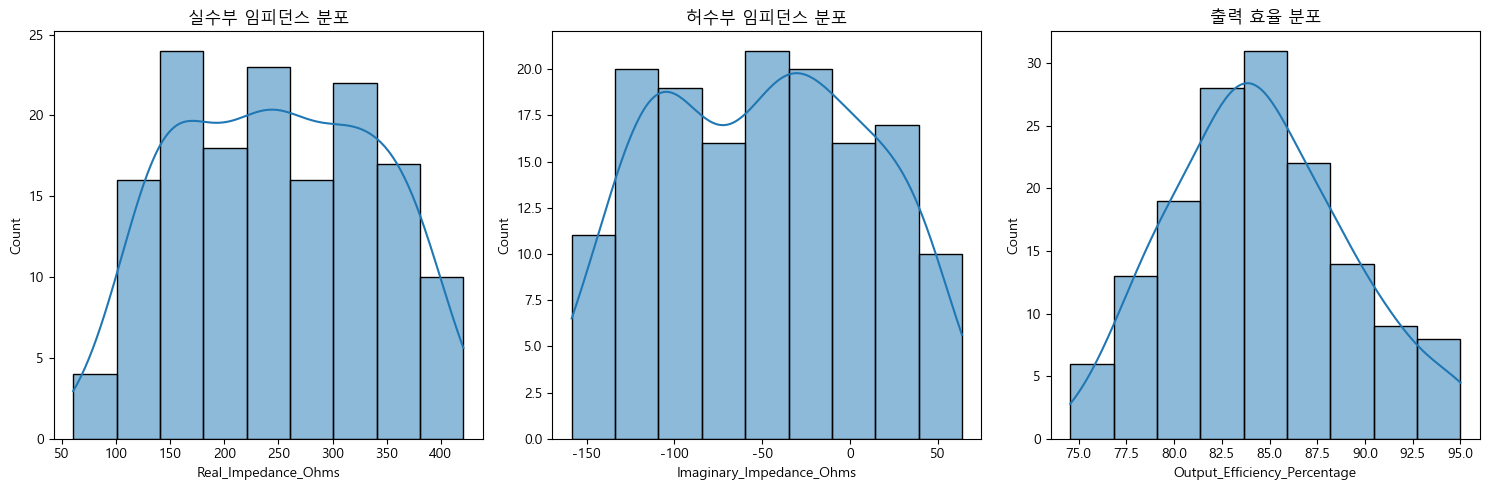

In [12]:
# 실수부, 허수부, 효율 분포
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Real_Impedance_Ohms'], kde=True)
plt.title('실수부 임피던스 분포')

plt.subplot(1, 3, 2)
sns.histplot(df['Imaginary_Impedance_Ohms'], kde=True)
plt.title('허수부 임피던스 분포')

plt.subplot(1, 3, 3)
sns.histplot(df['Output_Efficiency_Percentage'], kde=True)
plt.title('출력 효율 분포')

plt.tight_layout()
plt.savefig('img/01_impedance_distribution.png')
plt.show()


### 2.2. 임피던스 산점도 (효율별 색상 구분)

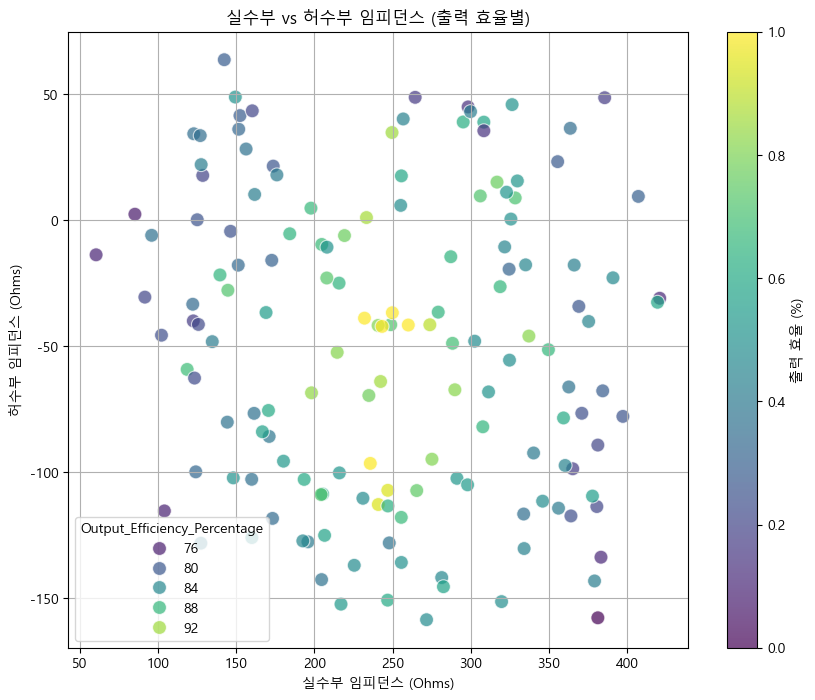

In [13]:
# 실수부 vs 허수부 임피던스 산점도 (효율에 따라 색상 구분)
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='Real_Impedance_Ohms', y='Imaginary_Impedance_Ohms', hue='Output_Efficiency_Percentage', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('실수부 vs 허수부 임피던스 (출력 효율별)')
plt.xlabel('실수부 임피던스 (Ohms)')
plt.ylabel('허수부 임피던스 (Ohms)')
# Get the mappable object from the scatter plot for colorbar
mappable = scatter_plot.collections[0]
plt.colorbar(mappable, label='출력 효율 (%)')
plt.grid(True)
plt.savefig('img/02_impedance_scatter_plot.png')
plt.show()


### 2.3. 주파수별 임피던스 및 효율 변화

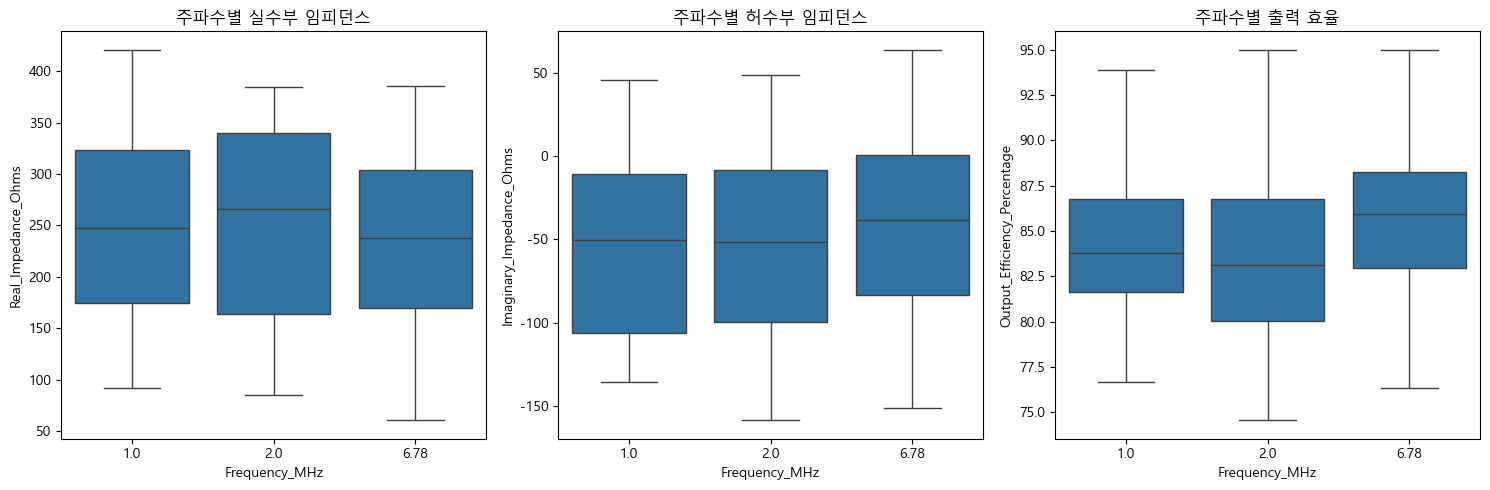

In [14]:
# 주파수별 실수부 임피던스
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Frequency_MHz', y='Real_Impedance_Ohms', data=df)
plt.title('주파수별 실수부 임피던스')

# 주파수별 허수부 임피던스
plt.subplot(1, 3, 2)
sns.boxplot(x='Frequency_MHz', y='Imaginary_Impedance_Ohms', data=df)
plt.title('주파수별 허수부 임피던스')

# 주파수별 출력 효율
plt.subplot(1, 3, 3)
sns.boxplot(x='Frequency_MHz', y='Output_Efficiency_Percentage', data=df)
plt.title('주파수별 출력 효율')

plt.tight_layout()
plt.savefig('img/03_frequency_impedance_efficiency.png')
plt.show()


### 2.4. 성별, 연령대, 얼굴 부위별 효율 변화

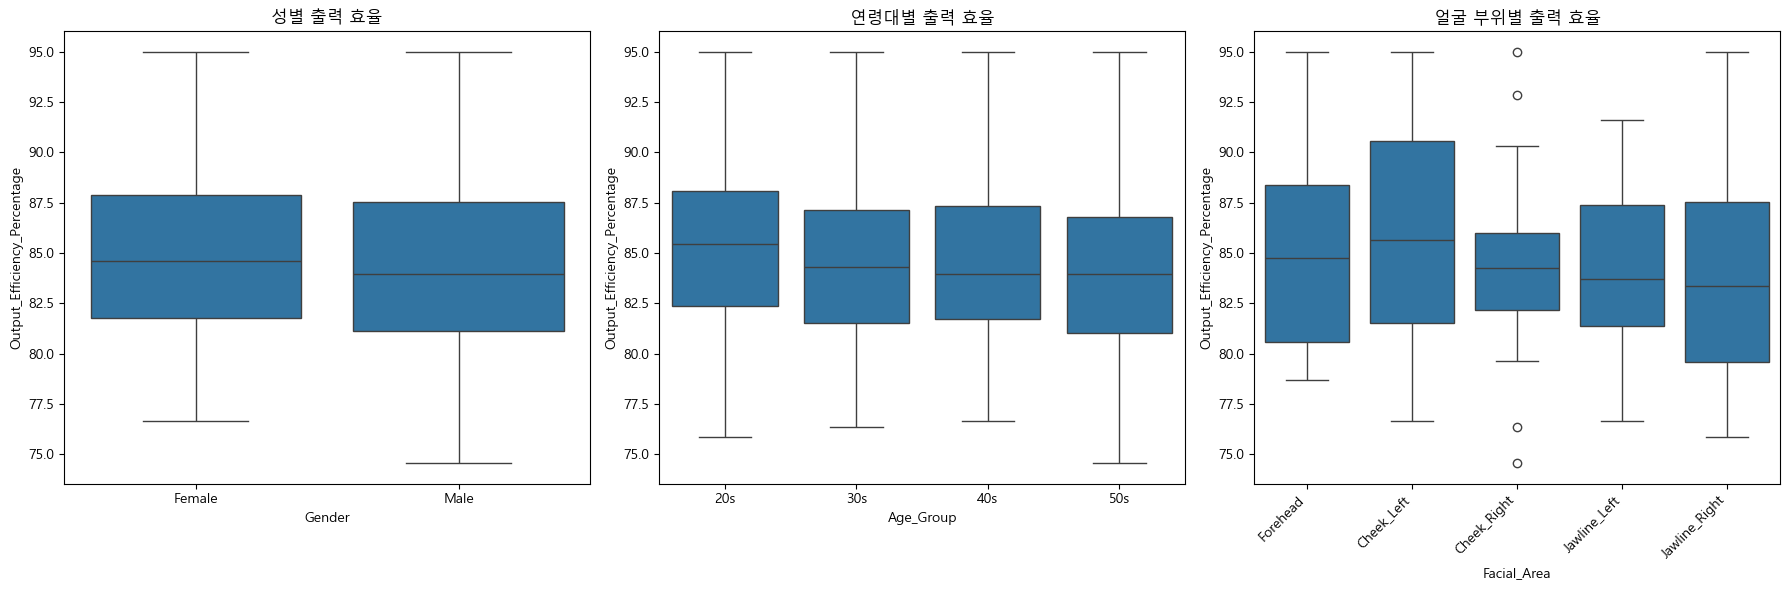

In [15]:
# 성별, 연령대, 얼굴 부위별 출력 효율
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Output_Efficiency_Percentage', data=df)
plt.title('성별 출력 효율')

plt.subplot(1, 3, 2)
sns.boxplot(x='Age_Group', y='Output_Efficiency_Percentage', data=df, order=['20s', '30s', '40s', '50s'])
plt.title('연령대별 출력 효율')

plt.subplot(1, 3, 3)
sns.boxplot(x='Facial_Area', y='Output_Efficiency_Percentage', data=df)
plt.title('얼굴 부위별 출력 효율')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('img/04_demographic_efficiency.png')
plt.show()


## 3. 간단한 회귀 분석

`Real_Impedance_Ohms`, `Imaginary_Impedance_Ohms`, `Frequency_MHz`를 사용하여 `Output_Efficiency_Percentage`를 예측하는 선형 회귀 모델을 구축합니다.

In [16]:
# 특성(X)과 타겟(y) 정의
X = df[['Real_Impedance_Ohms', 'Imaginary_Impedance_Ohms', 'Frequency_MHz']]
y = df['Output_Efficiency_Percentage']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"훈련 세트 크기: {X_train.shape[0]}")
print(f"테스트 세트 크기: {X_test.shape[0]}")

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"모델 계수: {model.coef_}")
print(f"모델 절편: {model.intercept_}")
print(f"평균 절대 오차 (MAE): {mae:.2f}")
print(f"결정 계수 (R-squared): {r2:.2f}")


훈련 세트 크기: 120
테스트 세트 크기: 30
모델 계수: [ 0.00238489 -0.00628135  0.32245968]
모델 절편: 82.28495828912123
평균 절대 오차 (MAE): 3.73
결정 계수 (R-squared): -0.10


### 3.1. 예측값과 실제값 비교 시각화

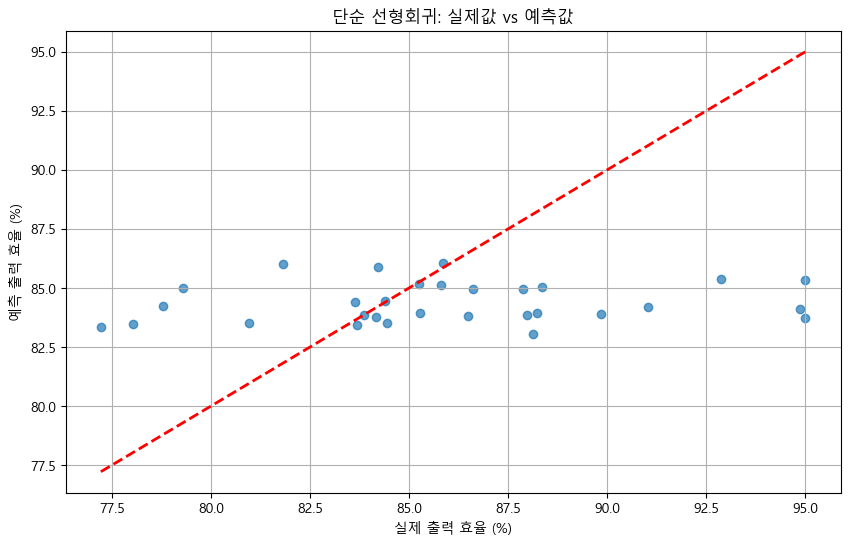

In [21]:
# 예측값과 실제값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 출력 효율 (%)')
plt.ylabel('예측 출력 효율 (%)')
plt.title('단순 선형회귀: 실제값 vs 예측값')
plt.grid(True)
plt.savefig('img/05_actual_vs_predicted_efficiency.png')
plt.show()


## 4. 특징 공학 (Feature Engineering)

복소 임피던스 데이터로부터 임피던스 크기(Magnitude)와 위상 각도(Phase Angle)를 계산하여 새로운 특징을 생성합니다. 이는 RF 시스템에서 중요한 물리적 의미를 가집니다.

In [18]:
# 임피던스 크기 계산: |Z| = sqrt(R^2 + X^2)
df['Impedance_Magnitude'] = np.sqrt(df['Real_Impedance_Ohms']**2 + df['Imaginary_Impedance_Ohms']**2)

# 임피던스 위상 각도 계산: Phase = atan2(X, R) (라디안)
df['Impedance_Phase_Rad'] = np.arctan2(df['Imaginary_Impedance_Ohms'], df['Real_Impedance_Ohms'])
# 위상 각도를 도로 변환 (선택 사항)
df['Impedance_Phase_Deg'] = np.degrees(df['Impedance_Phase_Rad'])

print(df[['Real_Impedance_Ohms', 'Imaginary_Impedance_Ohms', 'Impedance_Magnitude', 'Impedance_Phase_Deg']].head())


   Real_Impedance_Ohms  Imaginary_Impedance_Ohms  Impedance_Magnitude  \
0           355.576702                 23.291402           356.338716   
1           180.242200                -95.559864           204.007201   
2           171.053101                -85.748845           191.342697   
3           122.861752                 34.362121           127.576508   
4           159.909256               -102.756405           190.078534   

   Impedance_Phase_Deg  
0             3.747701  
1           -27.931406  
2           -26.624588  
3            15.625306  
4           -32.724475  


## 5. 범주형 특징 인코딩

머신러닝 모델에 범주형 데이터를 사용하기 위해 원-핫 인코딩(One-Hot Encoding)을 수행합니다.

In [19]:
# 범주형 특징 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['Gender', 'Age_Group', 'Facial_Area'], drop_first=True) # drop_first=True로 다중공선성 방지

print(df_encoded.head())


  Volunteer_ID  Frequency_MHz  Real_Impedance_Ohms  Imaginary_Impedance_Ohms  \
0          V01            1.0           355.576702                 23.291402   
1          V01            1.0           180.242200                -95.559864   
2          V01            1.0           171.053101                -85.748845   
3          V01            1.0           122.861752                 34.362121   
4          V01            1.0           159.909256               -102.756405   

   Output_Efficiency_Percentage  Impedance_Magnitude  Impedance_Phase_Rad  \
0                     80.114520           356.338716             0.065410   
1                     85.364078           204.007201            -0.487495   
2                     82.535906           191.342697            -0.464687   
3                     81.718206           127.576508             0.272713   
4                     81.877337           190.078534            -0.571150   

   Impedance_Phase_Deg  Gender_Male  Age_Group_30s  Age_

## 6. 고급 회귀 모델 (랜덤 포레스트) 및 비교

특징 공학 및 인코딩된 범주형 특징을 포함하여 랜덤 포레스트 회귀 모델을 구축하고, 선형 회귀 모델과 성능을 비교합니다.

랜덤 포레스트 모델 평균 절대 오차 (MAE): 3.28
랜덤 포레스트 모델 결정 계수 (R-squared): 0.27
--- 모델 성능 비교 ---
선형 회귀 MAE: 3.73, R-squared: -0.10
랜덤 포레스트 MAE: 3.28, R-squared: 0.27


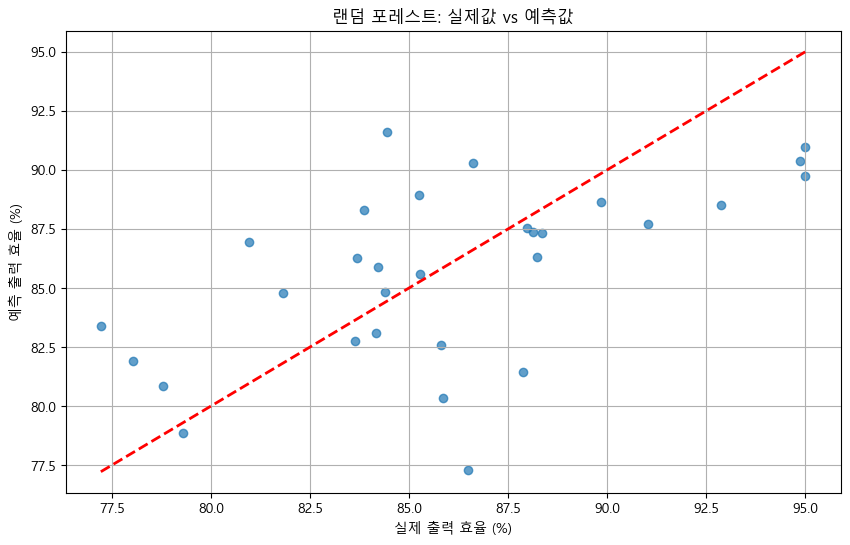

In [20]:
# 새로운 특성 및 인코딩된 범주형 특성으로 X 정의
X_advanced = df_encoded[[
    'Real_Impedance_Ohms', 'Imaginary_Impedance_Ohms', 'Frequency_MHz',
    'Impedance_Magnitude', 'Impedance_Phase_Deg',
    'Gender_Male',
    'Age_Group_30s', 'Age_Group_40s', 'Age_Group_50s',
    'Facial_Area_Cheek_Right', 'Facial_Area_Forehead', 'Facial_Area_Jawline_Left', 'Facial_Area_Jawline_Right'
]]
y_advanced = df_encoded['Output_Efficiency_Percentage']

# 훈련 세트와 테스트 세트 분리
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_advanced, y_advanced, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_adv, y_train_adv)

# 모델 평가
y_pred_adv = rf_model.predict(X_test_adv)

mae_adv = mean_absolute_error(y_test_adv, y_pred_adv)
r2_adv = r2_score(y_test_adv, y_pred_adv)

print(f"랜덤 포레스트 모델 평균 절대 오차 (MAE): {mae_adv:.2f}")
print(f"랜덤 포레스트 모델 결정 계수 (R-squared): {r2_adv:.2f}")

# 선형 회귀 모델 결과와 비교 (이전 셀에서 계산된 mae, r2 사용)
# Note: For a proper comparison, mae and r2 from the linear model should be re-calculated
# using the same train/test split as the advanced model, or passed as arguments.
# For simplicity in this notebook, we assume they are available from previous cell execution.
print("--- 모델 성능 비교 ---")
print(f"선형 회귀 MAE: {mae:.2f}, R-squared: {r2:.2f}")
print(f"랜덤 포레스트 MAE: {mae_adv:.2f}, R-squared: {r2_adv:.2f}")

# 예측값과 실제값 비교 시각화 (랜덤 포레스트)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_adv, y_pred_adv, alpha=0.7)
plt.plot([y_test_adv.min(), y_test_adv.max()], [y_test_adv.min(), y_test_adv.max()], 'r--', lw=2)
plt.xlabel('실제 출력 효율 (%)')
plt.ylabel('예측 출력 효율 (%)')
plt.title('랜덤 포레스트: 실제값 vs 예측값')
plt.grid(True)
plt.savefig('img/06_random_forest_actual_vs_predicted.png')
plt.show()
